# Homework 1 stellar model

I'm using [SymPy](https://sympy.org), the symbolic math library for python, to do the algebra here.  The next 2 cells load SymPy for interactive work and define the variables we are going to use (and treat as math symbols)

In [1]:
from sympy import init_session
init_session(use_latex="mathjax")
%matplotlib inline

IPython console for SymPy 1.13.2 (Python 3.12.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.2/



In [2]:
rho = symbols('rho', cls=Function)
qc = symbols('q_c')
pc = symbols('p_c')
G = symbols('G')
Mstar, Rstar = symbols(r'M_\star R_\star')
r = symbols('r')
xi = symbols('xi')
beta = symbols('beta')

Consider a mass profile in a star:
$$m(r) = 4\pi R^3 \beta \left [ \frac{1}{9} \left (\frac{r}{R} \right )^3 - \frac{1}{18} \left ( \frac{r}{R} \right)^6 \right ]$$
where $\beta$ is a constant

## a. density profile

What is the density profile, $\rho(r)$, that gives rise to this mass?

First let's plot the function $m(r)$

In [3]:
m = 4*pi*Rstar**3*beta*(Rational(1, 9) * (r/Rstar)**3 - Rational(1, 18) * (r/Rstar)**6)
m

               ⎛     3            6     ⎞
           3   ⎜    r            r      ⎟
4⋅π⋅R_\star ⋅β⋅⎜────────── - ───────────⎟
               ⎜         3             6⎟
               ⎝9⋅R_\star    18⋅R_\star ⎠

To make the plot we need to make it dimensionless, so we'll define $\xi = r/ R$.

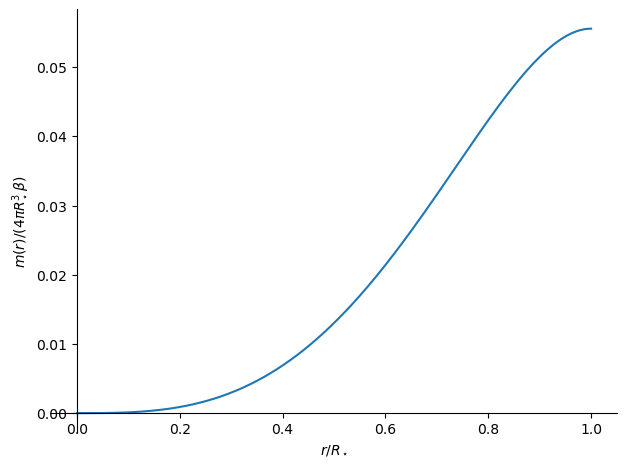

In [5]:
z = (m/(4*pi*Rstar**3*beta)).subs(r, xi*Rstar)
plot(z, (xi, 0, 1), xlabel=r"$r/R_\star$", ylabel=r"$m(r)/(4\pi R_\star^3\beta)$")

Now we get the density as
\begin{equation}
\rho = \frac{1}{4\pi r^2} \frac{dm}{dr}
\end{equation}

In [4]:
rho = m.diff(r, 1)/(4*pi*r**2)
rho = simplify(rho)
rho

  ⎛       3    3⎞
β⋅⎝R_\star  - r ⎠
─────────────────
            3    
   3⋅R_\star     

## b. central density

What is $\beta$ in terms of the central density?

The central density is just $\rho(0)$

In [5]:
rhoc = rho.subs(r, 0)
rhoc

β
─
3

So $\beta = 3 \rho_c$.  We can rewrite the density in terms of $\rho_c$ now

In [6]:
rhoc = symbols("rho_c")
rho = simplify(rho.subs(beta, 3*rhoc))
rho

        3     
       r ⋅ρ_c 
ρ_c - ────────
             3
      R_\star 

We can also rewrite the mass, $m(r)$, in terms of $\rho_c$:

In [7]:
m = simplify(m.subs(beta, 3*rhoc))
m

     3     ⎛         3    3⎞
2⋅π⋅r ⋅ρ_c⋅⎝2⋅R_\star  - r ⎠
────────────────────────────
                  3         
         3⋅R_\star          

Notice that the density vanishes at $r = R_\star$.  Now let's plot this.  

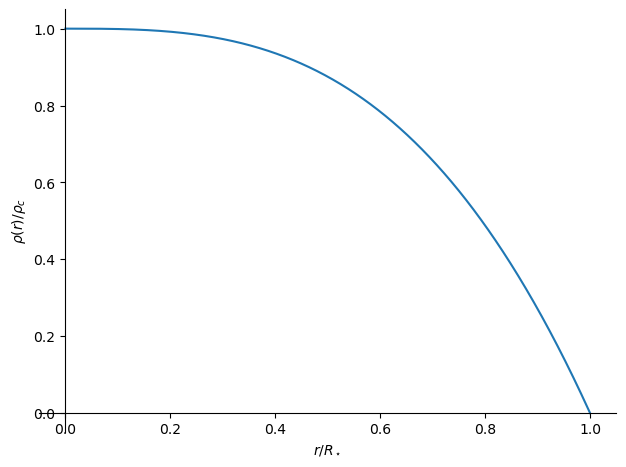

In [8]:
z = simplify((rho/rhoc).subs(r, xi*Rstar))
plot(z, (xi, 0, 1), xlabel=r"$r/R_\star$", ylabel=r"$\rho(r)/\rho_c$")

## c. ratio of central to average

What is the ratio of the central density to the average density, $\rho_c / \bar{\rho}$?

The average density is just the total mass divided by the volume of the star.  First we get the total mass, $M_\star = m(R_\star)$

In [9]:
Mstar = m.subs(r, Rstar)
Mstar

           3    
2⋅π⋅R_\star ⋅ρ_c
────────────────
       3        

and now we compute
\begin{equation}
\bar{\rho} = \frac{M_\star}{(4/3) \pi R_\star^3}
\end{equation}

In [10]:
rhobar = symbols(r"\bar{\rho}")
rhobar = Mstar / (Rational(4,3)*pi*Rstar**3)
rhobar

ρ_c
───
 2 

So $\bar{\rho} = \rho_c/2$ and the ratio of $\rho_c/\bar{\rho}$ is 2.

Alternately, we can do a volume-weighted average of $\rho(r)$:
\begin{equation}
\bar{\rho} = \frac{1}{V} \int_0^R 4\pi r^2 \rho(r) dr
\end{equation}

In [11]:
integrate(4*pi*r**2*rho, (r, 0, Rstar)) / (Rational(4,3)*pi*Rstar**3)

ρ_c
───
 2 

## d. central pressure

What is the central pressure of the star for this mass distribution?

Now we can integrate HSE.  We will do this as

$$p = p_c + \int_0^{R_\star} \frac{-Gm(r)}{r^2} \rho dr$$

Here I've written the integral in terms of $r$.
We'll substitute in our expressions for $m(r)$ and $\rho(r)$ in the integrand.

In [12]:
pc = symbols("p_c")
p = pc + integrate(-G*m/r**2*rho, (r, 0, Rstar))
p

               2    2      
  7⋅π⋅G⋅R_\star ⋅ρ_c       
- ─────────────────── + p_c
          20               

This was the integral to the surface, so this result is the surface pressure, but we know that $p(R_\star) = 0$, 
so we can enforce that here to find $p_c$

In [13]:
pc = solve(Eq(p, 0), pc)[0]
pc

             2    2
7⋅π⋅G⋅R_\star ⋅ρ_c 
───────────────────
        20         

This is $p_c$ in terms of $\rho_c$, but we can substitute in $\rho_c = 2 \bar{\rho}$ to find the central pressure in terms of $M_\star$ and $R_\star$.
(Note to make the code use $M_\star$ and not its equivalent in terms of $\rho_c$ found above, I am defining a new symbol $M$ here that will represent the total mass of the star.)

In [14]:
M = symbols("M")
pc.subs(rhoc, 2*M/(Rational(4,3)*pi*Rstar**3))

         2   
   63⋅G⋅M    
─────────────
            4
80⋅π⋅R_\star 

From this expression, we see that $f = 63/(80\pi)$.

## e. gravitational potential

What is the total gravitational potential energy, $\Omega$, of the star?

We integrate

$$\Omega = -\int_0^{M_\star} \frac{Gm(r)}{r} dm = -\int_0^{R_\star} \frac{G m(r)}{r} 4\pi r^2 \rho dr$$

To do this, we use our expression for $m(r)$ and $\rho(r)$

In [15]:
Omega = symbols("Omega")
Omega = integrate(-G*m*4*pi*r*rho, (r, 0, Rstar))

In [16]:
Omega

     2          5    2 
-17⋅π ⋅G⋅R_\star ⋅ρ_c  
───────────────────────
          55           

We can rewrite this in terms of mass, by using $\rho_c = 2 \bar{\rho}$ that we found for this model above

In [17]:
Omega = Omega.subs(rhoc, 2*M/(Rational(4,3)*pi*Rstar**3))
Omega

        2  
-153⋅G⋅M   
───────────
220⋅R_\star

So this shows that $\alpha = 153/220$.